1. a) Cargar el dataset definido en los notebooks anteriores y utilizando la investigación que desarrolló sobre los las relaciones entre las ventas y las demás variables para determinar que lags son los más adecuados para desarrollar modelos de forecasting. 

In [1]:
# Carga de datos:
import pandas as pd
import numpy as np
import os

ruta = r"C:\Users\MERBI10\Downloads\Tareas\Proyecto\Proyecto-EDA\data\raw\Base.xlsx"

df = pd.read_excel(ruta)

df.head()


,Año,Sucursal,Mes,Semana,Producto,Valores,Unidades
0,2024,Sucursal 001,1,1,PRODUCTO 1,249,1
1,2024,Sucursal 001,1,1,PRODUCTO 2,378,1
2,2024,Sucursal 001,1,1,PRODUCTO 6,803,2
3,2024,Sucursal 001,1,1,PRODUCTO 7,2857,5
4,2024,Sucursal 001,1,1,PRODUCTO 8,1715,3


In [ ]:
# Validación y orden
# Nuestros datos estan divididos en año, mes, semana. Se crea nueva columna
import pandas as pd

df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-W' + df['Semana'].astype(str) + '-1', errors='coerce')

# Ordenar por Sucursal, Producto y Fecha
df = df.sort_values(['Sucursal', 'Producto', 'Fecha']).reset_index(drop=True)

df[['Año', 'Mes', 'Semana', 'Fecha']].head()



C:\Users\MERBI10\AppData\Local\Temp\ipykernel_26556\895271287.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-W' + df['Semana'].astype(str) + '-1', errors='coerce')


,Año,Mes,Semana,Fecha
0,2024,1,1,NaT
1,2024,2,5,NaT
2,2024,3,9,NaT
3,2025,4,14,NaT
4,2024,1,1,NaT


In [7]:
#Creación lags
for lag in range(1, 9):
    df[f'valores_lag_{lag}'] = df.groupby(['Sucursal','Producto'])['Valores'].shift(lag)

df[['Sucursal','Producto','Semana','Valores'] + [f'valores_lag_{i}' for i in range(1,5)]].head(10)


,Sucursal,Producto,Semana,Valores,valores_lag_1,valores_lag_2,valores_lag_3,valores_lag_4
0,Sucursal 001,PRODUCTO 1,1,249,NaN,NaN,NaN,NaN
1,Sucursal 001,PRODUCTO 1,5,745,249.0,NaN,NaN,NaN
2,Sucursal 001,PRODUCTO 1,9,249,745.0,249.0,NaN,NaN
3,Sucursal 001,PRODUCTO 1,14,497,249.0,745.0,249.0,NaN
4,Sucursal 001,PRODUCTO 10,1,1543,NaN,NaN,NaN,NaN
5,Sucursal 001,PRODUCTO 10,5,2000,1543.0,NaN,NaN,NaN
6,Sucursal 001,PRODUCTO 10,9,2115,2000.0,1543.0,NaN,NaN
7,Sucursal 001,PRODUCTO 10,14,2172,2115.0,2000.0,1543.0,NaN
8,Sucursal 001,PRODUCTO 10,18,2115,2172.0,2115.0,2000.0,1543.0
9,Sucursal 001,PRODUCTO 10,22,3143,2115.0,2172.0,2115.0,2000.0


In [8]:
#Correlacion lags
corrs = df[['Valores'] + [f'valores_lag_{i}' for i in range(1,9)]].corr()['Valores'].drop('Valores').sort_values(ascending=False)

print("Correlación:")
display(corrs)


Correlación:


valores_lag_1    0.574725
valores_lag_2    0.528362
valores_lag_3    0.497854
valores_lag_4    0.472609
valores_lag_5    0.447111
valores_lag_6    0.420267
valores_lag_7    0.412735
valores_lag_8    0.411361
Name: Valores, dtype: float64

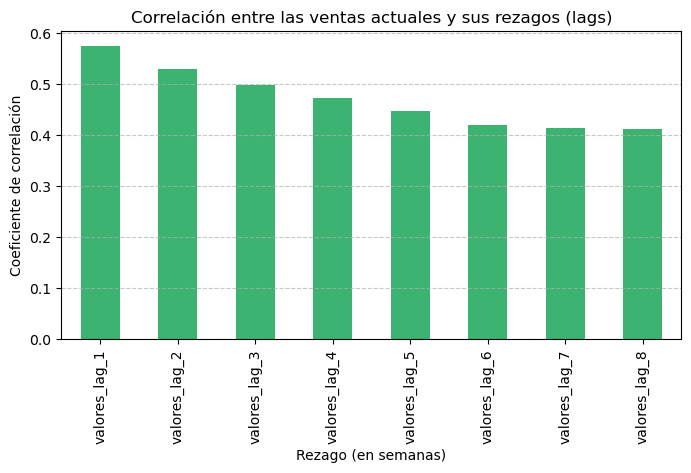

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
corrs.plot(kind='bar', color='mediumseagreen')
plt.title('Correlación entre las ventas actuales y sus rezagos (lags)')
plt.xlabel('Rezago (en semanas)')
plt.ylabel('Coeficiente de correlación')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [10]:
#Seleccion de lags
lags_seleccionados = [1, 2, 4]

print(f"Lags seleccionados: {lags_seleccionados}")


Lags seleccionados: [1, 2, 4]


1. b)Deberá aplicar al menos una operación de cada uno de los procesos de ingeniería de características. Indicando el criterio de selección de la operación. Si su dataset está completo o no es necesario aplicar alguna de esos proceso deberá forzar a que sea posible aplicarlos, es decir eliminar algunos datos de forma aleatoria y demás, lo importante es aplicar el menos una transformación de estas. No es necesario crear ningún operador ya que eso lo definiremos en la siguiente fase. Recuerde que los procesos de ingeniería de características son:

In [13]:
pip install scikit-learn


   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/8.9 MB 8.4 MB/s eta 0:00:01
   ---------------------------- ----------- 6.3/8.9 MB 19.3 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 20.4 MB/s  0:00:00

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [sc

In [ ]:
# i. Imputación de variables numéricas
from sklearn.impute import SimpleImputer
import numpy as np

np.random.seed(42)
idx_nan = df.sample(frac=0.02, random_state=42).index
df.loc[idx_nan, 'Valores'] = np.nan

imputer_num = SimpleImputer(strategy='median')
df['Valores_imp'] = imputer_num.fit_transform(df[['Valores']])

df[['Valores', 'Valores_imp']].head(10)



,Valores,Valores_imp
0,249.0,249.0
1,745.0,745.0
2,249.0,249.0
3,497.0,497.0
4,1543.0,1543.0
5,2000.0,2000.0
6,2115.0,2115.0
7,2172.0,2172.0
8,2115.0,2115.0
9,3143.0,3143.0


In [15]:
# ii. Imputación de variables categóricas
import numpy as np

np.random.seed(10)
idx_nan_cat = df.sample(frac=0.01, random_state=10).index
df.loc[idx_nan_cat, 'Sucursal'] = np.nan

print("Valores nulos antes de imputar:", df['Sucursal'].isna().sum())

df['Sucursal'] = df['Sucursal'].fillna('Desconocida')

print("Valores nulos después de imputar:", df['Sucursal'].isna().sum())

df[['Sucursal']].head(10)


Valores nulos antes de imputar: 245
Valores nulos después de imputar: 0


,Sucursal
0,Sucursal 001
1,Sucursal 001
2,Sucursal 001
3,Sucursal 001
4,Sucursal 001
5,Sucursal 001
6,Sucursal 001
7,Sucursal 001
8,Sucursal 001
9,Sucursal 001


In [16]:
# iii. Codificación de variables categóricas
from sklearn.preprocessing import LabelEncoder

le_suc = LabelEncoder()
le_prod = LabelEncoder()

df['Sucursal_cod'] = le_suc.fit_transform(df['Sucursal'])
df['Producto_cod'] = le_prod.fit_transform(df['Producto'])

df[['Sucursal', 'Sucursal_cod', 'Producto', 'Producto_cod']].head(10)


,Sucursal,Sucursal_cod,Producto,Producto_cod
0,Sucursal 001,1,PRODUCTO 1,0
1,Sucursal 001,1,PRODUCTO 1,0
2,Sucursal 001,1,PRODUCTO 1,0
3,Sucursal 001,1,PRODUCTO 1,0
4,Sucursal 001,1,PRODUCTO 10,1
5,Sucursal 001,1,PRODUCTO 10,1
6,Sucursal 001,1,PRODUCTO 10,1
7,Sucursal 001,1,PRODUCTO 10,1
8,Sucursal 001,1,PRODUCTO 10,1
9,Sucursal 001,1,PRODUCTO 10,1


In [18]:
#iv. Tratamiento de outliers
import numpy as np

Q1 = df['Valores_imp'].quantile(0.25)
Q3 = df['Valores_imp'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

print(f"Límite inferior: {lim_inf:.2f},  Límite superior: {lim_sup:.2f}")

df['Valores_clip'] = df['Valores_imp'].clip(lower=lim_inf, upper=lim_sup)

print("\nEstadísticas antes del tratamiento ")
print(df['Valores_imp'].describe())

print("\nEstadísticas después del tratamiento ")
print(df['Valores_clip'].describe())


Límite inferior: -714.50,  Límite superior: 2257.50

Estadísticas antes del tratamiento 
count    24518.000000
mean       866.748634
std        889.884863
min         58.000000
25%        400.000000
50%        572.000000
75%       1143.000000
max      27141.000000
Name: Valores_imp, dtype: float64

Estadísticas después del tratamiento 
count    24518.000000
mean       792.031630
std        594.952865
min         58.000000
25%        400.000000
50%        572.000000
75%       1143.000000
max       2257.500000
Name: Valores_clip, dtype: float64


In [19]:
# v. Transformación de variables numéricas. 
import numpy as np

df['Valores_log'] = np.log1p(df['Valores_clip']) 

df[['Valores_clip', 'Valores_log']].head(10)


,Valores_clip,Valores_log
0,249.0,5.521461
1,745.0,6.614726
2,249.0,5.521461
3,497.0,6.210600
4,1543.0,7.342132
5,2000.0,7.601402
6,2115.0,7.657283
7,2172.0,7.683864
8,2115.0,7.657283
9,2257.5,7.722456


In [20]:
# vi. Escalado de características. 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df['Valores_scaled'] = scaler.fit_transform(df[['Valores_clip']])

print(df[['Valores_clip', 'Valores_scaled']].head(10))
print("\nRango después del escalado:")
print(f"Mínimo: {df['Valores_scaled'].min():.2f} | Máximo: {df['Valores_scaled'].max():.2f}")


   Valores_clip  Valores_scaled
0         249.0        0.086838
1         745.0        0.312344
2         249.0        0.086838
3         497.0        0.199591
4        1543.0        0.675153
5        2000.0        0.882928
6        2115.0        0.935213
7        2172.0        0.961128
8        2115.0        0.935213
9        2257.5        1.000000

Rango después del escalado:
Mínimo: 0.00 | Máximo: 1.00


c. Al finalizar su proceso deberá listar con palabras el proceso deberá definir la lista de variables a las que se le aplicará dichas 
transformaciones así como los mecanismos de mapeo que considere necesarios (similar a los vistos en clase). 

In [22]:
mapeo_transformaciones = {
    'imputacion_numerica': {
        'variables': ['Valores'],
        'estrategia': 'Mediana',
        'resultado': 'Valores_imp'
    },
    'imputacion_categorica': {
        'variables': ['Sucursal'],
        'estrategia': 'Relleno con "Desconocida"',
        'resultado': 'Sucursal'
    },
    'codificacion': {
        'variables': ['Sucursal', 'Producto'],
        'metodo': 'LabelEncoder',
        'resultado': ['Sucursal_cod', 'Producto_cod']
    },
    'outliers': {
        'variables': ['Valores_imp'],
        'metodo': 'IQR (capado)',
        'resultado': 'Valores_clip'
    },
    'transformacion_numerica': {
        'variables': ['Valores_clip'],
        'metodo': 'log1p',
        'resultado': 'Valores_log'
    },
    'escalado': {
        'variables': ['Valores_clip'],
        'metodo': 'MinMaxScaler',
        'resultado': 'Valores_scaled'
    },
    'lags': {
        'variables': ['Valores'],
        'metodo': 'Shift por grupo (Sucursal, Producto)',
        'resultado': [f'valores_lag_{i}' for i in range(1,9)]
    }
}

from pprint import pprint
pprint(mapeo_transformaciones)

{'codificacion': {'metodo': 'LabelEncoder',
                  'resultado': ['Sucursal_cod', 'Producto_cod'],
                  'variables': ['Sucursal', 'Producto']},
 'escalado': {'metodo': 'MinMaxScaler',
              'resultado': 'Valores_scaled',
              'variables': ['Valores_clip']},
 'imputacion_categorica': {'estrategia': 'Relleno con "Desconocida"',
                           'resultado': 'Sucursal',
                           'variables': ['Sucursal']},
 'imputacion_numerica': {'estrategia': 'Mediana',
                         'resultado': 'Valores_imp',
                         'variables': ['Valores']},
 'lags': {'metodo': 'Shift por grupo (Sucursal, Producto)',
          'resultado': ['valores_lag_1',
                        'valores_lag_2',
                        'valores_lag_3',
                        'valores_lag_4',
                        'valores_lag_5',
                        'valores_lag_6',
                        'valores_lag_7',
                       

Durante esta etapa aplicamos diferentes procesos de ingeniería de características para preparar nuestro dataset de ventas antes de pasar a la fase de modelado. Realizamos imputaciones de datos numéricos y categóricos para evitar valores faltantes, codificamos las variables de texto como Sucursal y Producto, tratamos los outliers usando el método del rango intercuartílico, y transformamos los valores de ventas con una función logarítmica para estabilizar la varianza. Ademas normalizamos las variables mediante escalado Min-Max y generamos variables de rezago lags por sucursal y producto para capturar patrones temporales. Con estas transformaciones dejamos los datos listos y estructurados para construir los modelos de forecasting en la siguiente fase.